In [10]:
import matplotlib
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set()
sns.set_context("paper")
sns.set_style("whitegrid")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 20})

boxplotFigure = "figure5.pdf"
scatterplotFigure = "figure6.pdf"


filename = "../../results_aggr/app_AA-test_influxdb_run1.csv"

In [11]:
print("start...")
df_latencies = pd.read_csv(filename)
print("done.")

start...
done.


In [12]:
inserts= df_latencies.loc[df_latencies['type'] == 'inserts']
queries1= df_latencies.loc[df_latencies['type'] == 'simple queries']
queries2= df_latencies.loc[df_latencies['type'] == 'group-by queries']

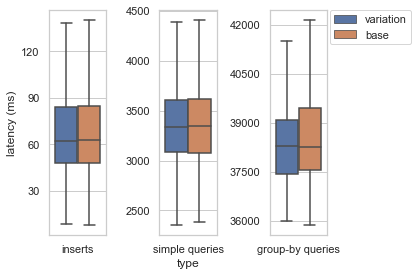

In [13]:
sns.set(style="whitegrid")
f, axes = plt.subplots(1, 3)

a1 = sns.boxplot(y="latency (ms)", x= "type", data=inserts,  orient='v' , ax=axes[0], showfliers=False, hue="version")
a2 = sns.boxplot(y="latency (ms)", x= "type", data=queries1,  orient='v' , ax=axes[1], showfliers=False, hue="version")
a3 = sns.boxplot(y="latency (ms)", x= "type", data=queries2,  orient='v' , ax=axes[2], showfliers=False, hue="version")

a1.get_legend().remove()
a1.set(xlabel=None)
a1.yaxis.set_major_locator(MaxNLocator(5))

a2.get_legend().remove()
a2.set(ylabel=None)
a2.yaxis.set_major_locator(MaxNLocator(5))

a3.get_legend().remove()
a3.set(xlabel=None)
a3.set(ylabel=None)
a3.yaxis.set_major_locator(MaxNLocator(5))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
f.savefig(boxplotFigure, bbox_inches='tight')
plt.show()


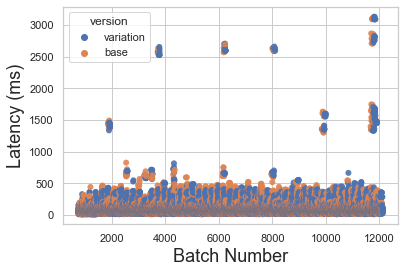

In [14]:
#sns.scatterplot(data=inserts, x="number", y="latency (ms)", hue="version", alpha=0.9,  style='version', markers=['*d', 's'])
f, axes = plt.subplots(1, 1)
sns.scatterplot(data=inserts, x="number", y="latency (ms)", hue="version", alpha=0.9,  markers='d', linewidth=0)
plt.xlabel('Batch Number', fontsize=18)
plt.ylabel('Latency (ms)', fontsize=18)
f.savefig(scatterplotFigure, bbox_inches='tight')
plt.show()